<a href="https://colab.research.google.com/github/mmaithani/data-science/blob/main/DeOldify_Image_%26_Video_Colorizer_GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# Correct Runtime Settings

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU 


# Git clone and install DeOldify

## i have forked the official repo: [https://github.com/jantic/DeOldify](https://github.com/jantic/DeOldify) and added some test images for ease

In [ ]:
!git clone https://github.com/mmaithani/DeOldify.git DeOldify 

In [ ]:
cd DeOldify

# Setup

In [ ]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [ ]:
!pip install -r colab_requirements.txt

In [ ]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

In [ ]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

In [ ]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

In [ ]:
colorizer = get_image_colorizer(artistic=True)

# Let's Colorize!!

In [ ]:
source_url = 'https://images.pexels.com/photos/3031397/pexels-photo-3031397.jpeg' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url :) ')

## See how well render_factor values perform on the image here

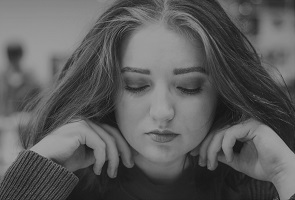

In [ ]:
for i in range(10,40,2):
    colorizer.plot_transformed_image('/content/DeOldify/test_images/vic-P8Fxe0J8Flo-unsplash.jpg', render_factor=i, display_render_factor=True, figsize=(8,8))

## result(colored) image is stored in /DeOldify/test_images/
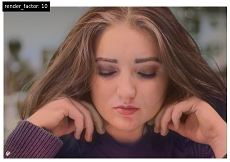

In [ ]:
for i in range(10,40,2):
    colorizer.plot_transformed_image('/content/DeOldify/test_images/mvf78f3j7z961.png', render_factor=i, display_render_factor=True, figsize=(8,8))

In [ ]:
for i in range(10,40,2):
    colorizer.plot_transformed_image('/content/DeOldify/test_images/black-and-white-landscapes.jpg', render_factor=i, display_render_factor=True, figsize=(8,8))

In [ ]:
for i in range(10,40,2):
    colorizer.plot_transformed_image('/content/DeOldify/test_images/68747470733a2f2f692e696d6775722e636f6d2f427430766e6b652e6a7067 (2).jpg', render_factor=i, display_render_factor=True, figsize=(8,8))

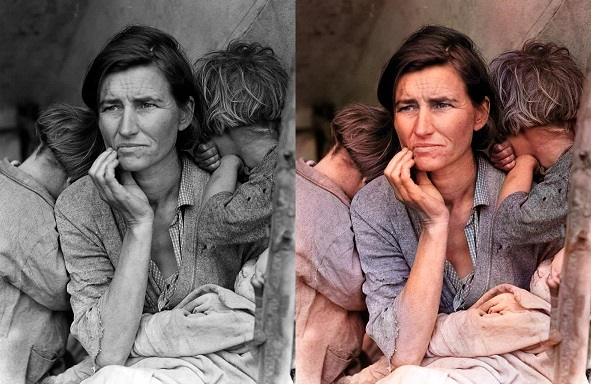

# video colorize

In [ ]:
!wget https://data.deepai.org/deoldify/ColorizeVideo_gen.pth -O ./models/ColorizeVideo_gen.pth

In [ ]:
colorizer = get_video_colorizer()

In [ ]:
source_url = 'https://www.youtube.com/watch?v=zqqQxUS3GwE' #@param {type:"string"}
render_factor = 21  #@param {type: "slider", min: 5, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    video_path = colorizer.colorize_from_url(source_url, 'video.mp4', render_factor, watermarked=watermarked)
    show_video_in_notebook(video_path)
else:
    print('Provide a video url and try again.')

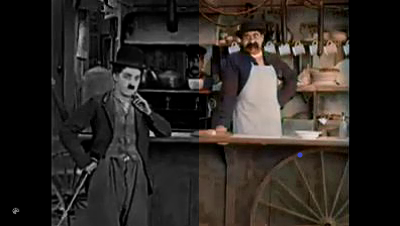

https://youtu.be/jXQYDr2TIhM